# Class 7: Combining datasets

&nbsp;  
**Welcome to class 7!** Today we're going to revisit pandas and practice combining datasets. There are many instances in which this might be necessary: adding gene expression data from multiple RNASeq experiments, joining protein annotations and structural data, or adding species taxonomies to distribution dats for example.

There are three main ways that we can do this in pandas: concatenating (`concat()`), merging (`merge()`) and joining (`join()`), and we'll work through all of these in turn.

Before we dive in, let's go over some vocabulary. If we have two dataframes with some information in common, then:

 - an **outer join** outputs all the information from both dataframes together
 - an **inner join** outputs just the information both dataframes have in common
 - a **left** or **right join** outputs the information from one of the dataframes, plus the overlap

<div>
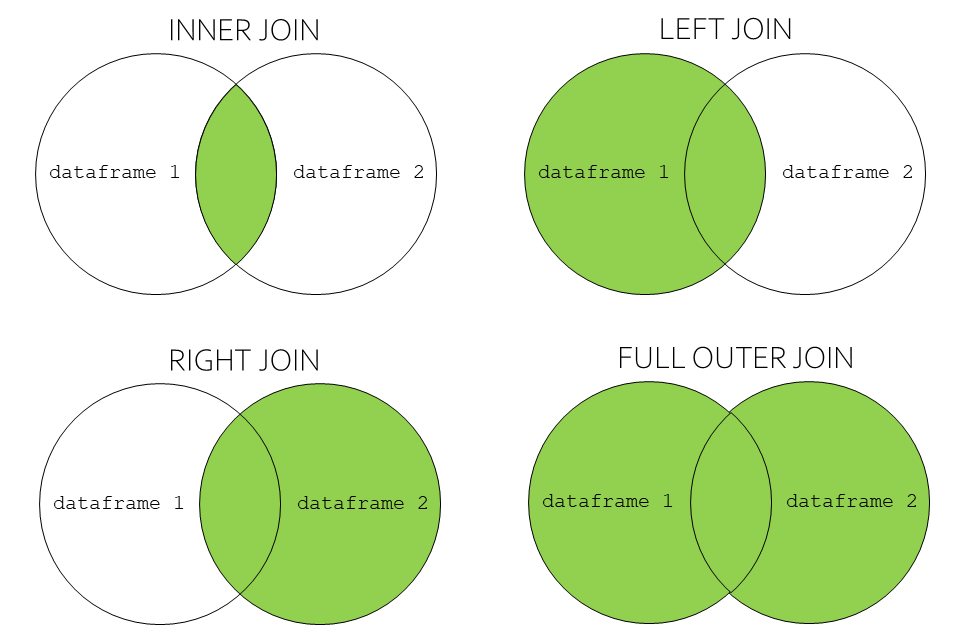
</div>

## Load the modules

First, let's import pandas.

In [1]:
import pandas as pd

## Concatenating (`concat()`)

`concat()` is used to append one (or more) dataframes one below the other (or next to each other, depending on whether the axis option is set to 0 or 1). The function takes the form `pd.concat([dataframes], axis, join, keys...)`.

- `[dataframes]` is the list of dataframes you want to concatenate.
- `axis` specifies the axis to concatenate along.
- `join` is the type of join (inner or outer). The default for `pd.concat()` is outer.
- `keys` allows you to add labels to the resulting dataframe so you can determine where the data came from.

<div class="alert alert-block alert-info">
<b>Remember:</b> axis tells Python in which direction to perform the operation. axis = 1 tells Python to perform the operation by moving across the columns. axis = 0 tells Python to perform the operation by moving down the rows.
    
    | Column A | Column B |
    -----------------------
    | 0.626386 | 1.523251 |---- axis = 1 ----->
    ----------------------- 
         |         
         | axis = 0  
         ↓         
</div>

Let's see how this all works.

&nbsp;  
<div>
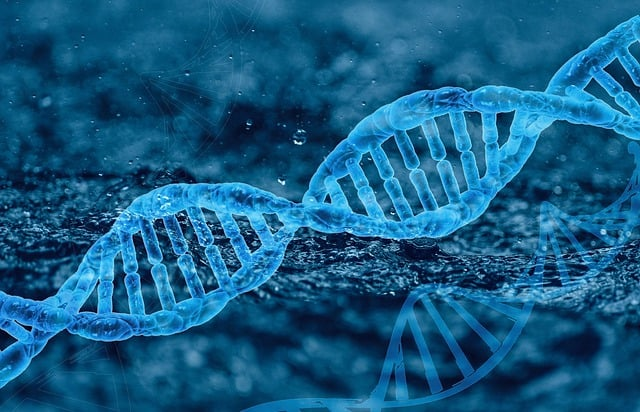
</div>
&nbsp;  

In the cells below, read in Infected.csv and Control.csv from the Datasets folder. Call them 'infected' and 'control' respectively.

In [2]:
infected = pd.read_csv('../Datasets/Infected.csv')

In [3]:
control = pd.read_csv('../Datasets/Control.csv')

Let's have a look at them.

In [4]:
infected

,Transcript,Rep1,Rep2,Rep3
0,GL2,2975,1512,1701
1,HEN3,2478,1005,1410
2,AP1,3033,1005,1410
3,AGO1,6461,1671,411
4,WER,3184,1257,1137
5,CPC,584,1458,1509
6,RDR2,72,3984,1914


In [5]:
control

,Transcript,Rep1,Rep2,Rep3
0,AG,834,190,206
1,AP1,1671,1288,404
2,LFY,1512,3142,3018
3,UFO,1296,2903,2761
4,AGO1,1590,63189,144704
5,CLF,2901,3639,13308
6,HEN3,1446,18054,13346
7,RDR2,543,173,825
8,TTG,669,144,59
9,GL2,1047,1922,2084


First, we'll append control under infected.

In [6]:
df = pd.concat([infected, control], axis = 0)
df

,Transcript,Rep1,Rep2,Rep3
0,GL2,2975,1512,1701
1,HEN3,2478,1005,1410
2,AP1,3033,1005,1410
3,AGO1,6461,1671,411
4,WER,3184,1257,1137
5,CPC,584,1458,1509
6,RDR2,72,3984,1914
0,AG,834,190,206
1,AP1,1671,1288,404
2,LFY,1512,3142,3018


Now rewrite the code above but use `axis = 1`. What happens?

In [7]:
df = pd.concat([infected, control], axis = 1)
df

,Transcript,Rep1,Rep2,Rep3,Transcript,Rep1,Rep2,Rep3
0,GL2,2975.0,1512.0,1701.0,AG,834,190,206
1,HEN3,2478.0,1005.0,1410.0,AP1,1671,1288,404
2,AP1,3033.0,1005.0,1410.0,LFY,1512,3142,3018
3,AGO1,6461.0,1671.0,411.0,UFO,1296,2903,2761
4,WER,3184.0,1257.0,1137.0,AGO1,1590,63189,144704
5,CPC,584.0,1458.0,1509.0,CLF,2901,3639,13308
6,RDR2,72.0,3984.0,1914.0,HEN3,1446,18054,13346
7,NaN,NaN,NaN,NaN,RDR2,543,173,825
8,NaN,NaN,NaN,NaN,TTG,669,144,59
9,NaN,NaN,NaN,NaN,GL2,1047,1922,2084


It is often useful to add a label to our data, so that we know which dataset it originated from. We can do this using `keys`.

In [8]:
df = pd.concat([infected, control], keys = ["infected", "control"], axis = 0)
df

Transcript   Rep1   Rep2    Rep3
infected 0         GL2   2975   1512    1701
         1        HEN3   2478   1005    1410
         2         AP1   3033   1005    1410
         3        AGO1   6461   1671     411
         4         WER   3184   1257    1137
         5         CPC    584   1458    1509
         6        RDR2     72   3984    1914
control  0          AG    834    190     206
         1         AP1   1671   1288     404
         2         LFY   1512   3142    3018
         3         UFO   1296   2903    2761
         4        AGO1   1590  63189  144704
         5         CLF   2901   3639   13308
         6        HEN3   1446  18054   13346
         7        RDR2    543    173     825
         8         TTG    669    144      59
         9         GL2   1047   1922    2084
         10        WER  11037    451    2678
         11        CPC   2329   1316    2070

Try this again, but use `axis = 1`. See how the labels have been added this time.

In [9]:
df = pd.concat([infected, control], keys = ["infected", "control"], axis = 1)
df

infected                            control                      
   Transcript    Rep1    Rep2    Rep3 Transcript   Rep1   Rep2    Rep3
0         GL2  2975.0  1512.0  1701.0         AG    834    190     206
1        HEN3  2478.0  1005.0  1410.0        AP1   1671   1288     404
2         AP1  3033.0  1005.0  1410.0        LFY   1512   3142    3018
3        AGO1  6461.0  1671.0   411.0        UFO   1296   2903    2761
4         WER  3184.0  1257.0  1137.0       AGO1   1590  63189  144704
5         CPC   584.0  1458.0  1509.0        CLF   2901   3639   13308
6        RDR2    72.0  3984.0  1914.0       HEN3   1446  18054   13346
7         NaN     NaN     NaN     NaN       RDR2    543    173     825
8         NaN     NaN     NaN     NaN        TTG    669    144      59
9         NaN     NaN     NaN     NaN        GL2   1047   1922    2084
10        NaN     NaN     NaN     NaN        WER  11037    451    2678
11        NaN     NaN     NaN     NaN        CPC   2329   1316    2070

The dataframes we have created by concatenating infected and control aren't particularly useful. You can see how, in the dataframe above, we have different transcripts on the same row. This is because `concat()` joins dataframes together based on index number. In this case, it would make much more sense to join the datasets together based on 'Transcript'. To do this, we need to make 'Transcript' the index. 

We can tell Python to use a particular column as the index with the code `df.set_index('COLUMN_NAME')`.

In [10]:
df = pd.concat([infected.set_index('Transcript'), control.set_index('Transcript')], keys = ["infected", "control"], axis = 1)
df

infected                 control               
               Rep1    Rep2    Rep3    Rep1   Rep2    Rep3
Transcript                                                
GL2          2975.0  1512.0  1701.0    1047   1922    2084
HEN3         2478.0  1005.0  1410.0    1446  18054   13346
AP1          3033.0  1005.0  1410.0    1671   1288     404
AGO1         6461.0  1671.0   411.0    1590  63189  144704
WER          3184.0  1257.0  1137.0   11037    451    2678
CPC           584.0  1458.0  1509.0    2329   1316    2070
RDR2           72.0  3984.0  1914.0     543    173     825
AG              NaN     NaN     NaN     834    190     206
LFY             NaN     NaN     NaN    1512   3142    3018
UFO             NaN     NaN     NaN    1296   2903    2761
CLF             NaN     NaN     NaN    2901   3639   13308
TTG             NaN     NaN     NaN     669    144      59

The data for each transcript are now in the same row!

Let's now explore another type of join. The default for `concat()` is an outer join, so the datasets are joined together in their entirety. Run the code below, and have a look at the output of an **inner** join. How is it different to the output above?

In [11]:
df = pd.concat([infected.set_index('Transcript'), control.set_index('Transcript')], join = 'inner',
               keys = ["infected", "control"], axis = 1)
df

infected             control               
               Rep1  Rep2  Rep3    Rep1   Rep2    Rep3
Transcript                                            
GL2            2975  1512  1701    1047   1922    2084
HEN3           2478  1005  1410    1446  18054   13346
AP1            3033  1005  1410    1671   1288     404
AGO1           6461  1671   411    1590  63189  144704
WER            3184  1257  1137   11037    451    2678
CPC             584  1458  1509    2329   1316    2070
RDR2             72  3984  1914     543    173     825

## Merging (`merge()`)

Typically, merging is used to combine two dataframes that share a common column, and is probably the most flexible of the three methods. It takes the form `dataframe1.merge(dataframe2, how, on, suffixes...`).

- `dataframe1` is the name of the first dataframe.
- `dataframe2` is the name of the second dataframe.
- `how` specifies the type of join. The default is 'inner'.
- `on` is the name of the column to join on.
- `suffixes` are the labels you can add to the data indicating which dataframe it originated from.

Let's apply it to the infected and control datasets. We'll merge them on their common column 'Transcript'.

In [12]:
df = infected.merge(control, how = 'outer', on = 'Transcript', suffixes = ['_Infected', '_Control'])
df

,Transcript,Rep1_Infected,Rep2_Infected,Rep3_Infected,Rep1_Control,Rep2_Control,Rep3_Control
0,AG,NaN,NaN,NaN,834,190,206
1,AGO1,6461.0,1671.0,411.0,1590,63189,144704
2,AP1,3033.0,1005.0,1410.0,1671,1288,404
3,CLF,NaN,NaN,NaN,2901,3639,13308
4,CPC,584.0,1458.0,1509.0,2329,1316,2070
5,GL2,2975.0,1512.0,1701.0,1047,1922,2084
6,HEN3,2478.0,1005.0,1410.0,1446,18054,13346
7,LFY,NaN,NaN,NaN,1512,3142,3018
8,RDR2,72.0,3984.0,1914.0,543,173,825
9,TTG,NaN,NaN,NaN,669,144,59


It is possible to perform outer, inner, left and right joins with `merge()`. Run the code below to perform an inner join. Then try it again with a left and then a right join. Look at the output to see what each of these are doing.

In [13]:
df = infected.merge(control, how = 'inner', on = 'Transcript', suffixes = ['_Infected', '_Control'])
df

,Transcript,Rep1_Infected,Rep2_Infected,Rep3_Infected,Rep1_Control,Rep2_Control,Rep3_Control
0,GL2,2975,1512,1701,1047,1922,2084
1,HEN3,2478,1005,1410,1446,18054,13346
2,AP1,3033,1005,1410,1671,1288,404
3,AGO1,6461,1671,411,1590,63189,144704
4,WER,3184,1257,1137,11037,451,2678
5,CPC,584,1458,1509,2329,1316,2070
6,RDR2,72,3984,1914,543,173,825


A really handy feature of `merge()` is that you can join two datasets on a common column, even if the names of those columns differ.

Read in Location.csv and anot.csv from the Datasets folder. Call them 'location' and 'anot' respectively. Print them out so you know what they look like.

In [14]:
location = pd.read_csv('../Datasets/Location.csv')
location

,Locus,Chrm,LOC,Length
0,AG,10,68,8233
1,AP1,20,1130,72864
2,LFY,15,20333,15657
3,UFO,9,2824,7891
4,AGO1,9,4507,11478
5,CLF,6,1604,4948
6,HEN3,8,3923,5524
7,RDR2,11,3393,18581
8,TTG,2,19551,2282
9,GL2,7,22314,3456


In [15]:
anot = pd.read_csv('../Datasets/anot.csv')
anot

,Gene,Name,Locus,Function,Pathway
0,AG,AGAMOUS,AT4G18960,MADS domain transcription factor.,Flowering
1,AP1,APETALA1,AT1G69120,MADS domain transcription factor.,Flowering
2,LFY,LEAFY,AT5G61850,LFY domain TF,Flowering
3,UFO,UNUSUAL FLORAL ORGANS,AT1G30950,F-box family protein,Flowering
4,AGO1,ARGONAUTE 1,AT1G48410,RNA Slicer,Epigenetic
5,CLF,CURLY LEAF,AT2G23380,Polycomb-group gene,Epigenetic
6,HEN3,HUA ENHANCER 3,AT5G63610,Cyclin-dependent protein kinases,Epigenetic
7,RDR2,RNA-DEPENDENT RNA POLYMERASE 2,AT4G11130,RNA-dependent RNA polymerase,Epigenetic
8,TTG,TRANSPARENT TEST G>ABRA,AT5G24520,WD40 repeat TF,Trichome
9,GL2,GLABRA2,AT1G79840,homeodomain protein,Trichome


The 'Locus' column of location contains the same information as the 'Gene' column of anot. To merge these together, we need to add `left_on = ` and `right_on` into our code. 'Left' refers to dataframe1 and 'right' refers to dataframe2.

In [16]:
df = location.merge(anot, left_on = 'Locus', right_on = 'Gene')
df

,Locus_x,Chrm,LOC,Length,Gene,Name,Locus_y,Function,Pathway
0,AG,10,68,8233,AG,AGAMOUS,AT4G18960,MADS domain transcription factor.,Flowering
1,AP1,20,1130,72864,AP1,APETALA1,AT1G69120,MADS domain transcription factor.,Flowering
2,LFY,15,20333,15657,LFY,LEAFY,AT5G61850,LFY domain TF,Flowering
3,UFO,9,2824,7891,UFO,UNUSUAL FLORAL ORGANS,AT1G30950,F-box family protein,Flowering
4,AGO1,9,4507,11478,AGO1,ARGONAUTE 1,AT1G48410,RNA Slicer,Epigenetic
5,CLF,6,1604,4948,CLF,CURLY LEAF,AT2G23380,Polycomb-group gene,Epigenetic
6,HEN3,8,3923,5524,HEN3,HUA ENHANCER 3,AT5G63610,Cyclin-dependent protein kinases,Epigenetic
7,RDR2,11,3393,18581,RDR2,RNA-DEPENDENT RNA POLYMERASE 2,AT4G11130,RNA-dependent RNA polymerase,Epigenetic
8,TTG,2,19551,2282,TTG,TRANSPARENT TEST G>ABRA,AT5G24520,WD40 repeat TF,Trichome
9,GL2,7,22314,3456,GL2,GLABRA2,AT1G79840,homeodomain protein,Trichome


Note how pandas has dealt with the two columns called 'Locus' which contain different information.

### Chaining `merge()` commands

Pandas also allows you to **chain** multiple `merge()` commands. This allows you to write multiple commands in a single line, resulting in cleaner and more readable code:

    `df = dataframe1.merge().merge()`.... etc

Let's merge infected and control, then merge the output dataframe with location.

In [17]:
df = infected.merge(control, on = 'Transcript').merge(location, left_on = 'Transcript', right_on = 'Locus')
df

,Transcript,Rep1_x,Rep2_x,Rep3_x,Rep1_y,Rep2_y,Rep3_y,Locus,Chrm,LOC,Length
0,GL2,2975,1512,1701,1047,1922,2084,GL2,7,22314,3456
1,HEN3,2478,1005,1410,1446,18054,13346,HEN3,8,3923,5524
2,AP1,3033,1005,1410,1671,1288,404,AP1,20,1130,72864
3,AGO1,6461,1671,411,1590,63189,144704,AGO1,9,4507,11478
4,WER,3184,1257,1137,11037,451,2678,WER,2,212,7690
5,CPC,584,1458,1509,2329,1316,2070,CPC,4,4567,13542
6,RDR2,72,3984,1914,543,173,825,RDR2,11,3393,18581


Now try merging infected with control, then with location and then with anot.

In [18]:
df = infected.merge(control, on = 'Transcript').merge(location, left_on = 'Transcript', right_on = 'Locus').merge(anot, left_on = 'Transcript', right_on = 'Gene')
df

,Transcript,Rep1_x,Rep2_x,Rep3_x,Rep1_y,Rep2_y,Rep3_y,Locus_x,Chrm,LOC,Length,Gene,Name,Locus_y,Function,Pathway
0,GL2,2975,1512,1701,1047,1922,2084,GL2,7,22314,3456,GL2,GLABRA2,AT1G79840,homeodomain protein,Trichome
1,HEN3,2478,1005,1410,1446,18054,13346,HEN3,8,3923,5524,HEN3,HUA ENHANCER 3,AT5G63610,Cyclin-dependent protein kinases,Epigenetic
2,AP1,3033,1005,1410,1671,1288,404,AP1,20,1130,72864,AP1,APETALA1,AT1G69120,MADS domain transcription factor.,Flowering
3,AGO1,6461,1671,411,1590,63189,144704,AGO1,9,4507,11478,AGO1,ARGONAUTE 1,AT1G48410,RNA Slicer,Epigenetic
4,WER,3184,1257,1137,11037,451,2678,WER,2,212,7690,WER,WEREWOLF,AT5G14750,MyB domain TF,Trichome
5,CPC,584,1458,1509,2329,1316,2070,CPC,4,4567,13542,CPC,CAPRICE,AT2G46410,MyB domain TF,Trichome
6,RDR2,72,3984,1914,543,173,825,RDR2,11,3393,18581,RDR2,RNA-DEPENDENT RNA POLYMERASE 2,AT4G11130,RNA-dependent RNA polymerase,Epigenetic


## Joining (`join()`)

By default, `join()` joins datasets together on indexes, and takes the form `dataframe1.join(dataframe2, how, lsuffix, rsuffix...`).

- `dataframe1` is the name of the first dataframe.
- `dataframe2` is the name of the second dataframe.
- `how` specifies the type of join. The default is 'left'.
- `lsuffix` is the label attached to the data from the left dataframe (dataframe1).
- `rsuffix` is the label attached to the data from the right dataframe (dataframe2).

Let's apply it to the infected and control datasets.

In [19]:
df = infected.join(control, lsuffix = '_Infected', rsuffix = '_Control')
df

,Transcript_Infected,Rep1_Infected,Rep2_Infected,Rep3_Infected,Transcript_Control,Rep1_Control,Rep2_Control,Rep3_Control
0,GL2,2975,1512,1701,AG,834,190,206
1,HEN3,2478,1005,1410,AP1,1671,1288,404
2,AP1,3033,1005,1410,LFY,1512,3142,3018
3,AGO1,6461,1671,411,UFO,1296,2903,2761
4,WER,3184,1257,1137,AGO1,1590,63189,144704
5,CPC,584,1458,1509,CLF,2901,3639,13308
6,RDR2,72,3984,1914,HEN3,1446,18054,13346


Once again, we have data from different transcripts in the same row. To fix this, we can use the same technique we used with `concat()` and make the common column 'Transcript' the index of both datasets. Edit the code above by adding `.set_index('Transcript')` to each dataset, and look at the resulting dataframe. The two dataframes should now be aligned so that data from the same transcript appear in the same row.

In [20]:
df = infected.set_index('Transcript').join(control.set_index('Transcript'), lsuffix = '_Infected', rsuffix = '_Control')
df

,Rep1_Infected,Rep2_Infected,Rep3_Infected,Rep1_Control,Rep2_Control,Rep3_Control
Transcript,,,,,,
GL2,2975,1512,1701,1047,1922,2084
HEN3,2478,1005,1410,1446,18054,13346
AP1,3033,1005,1410,1671,1288,404
AGO1,6461,1671,411,1590,63189,144704
WER,3184,1257,1137,11037,451,2678
CPC,584,1458,1509,2329,1316,2070
RDR2,72,3984,1914,543,173,825


## A bit more practice

We'll return to the Greenland chick data from week 2, and add in some climate data collected from the nesting sites.

Read in Greenland_nests.csv and Greenland_climate.csv from the Datasets folder. Call them nests and climate respectively. Check to see they have loaded in correctly.

In [21]:
nests = pd.read_csv('../Datasets/Greenland_nests.csv')
climate = pd.read_csv('../Datasets/Greenland_climate.csv')

In [22]:
nests

,Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Qaanaq,0.21,0.00,0.57,0.22,0.00,356
1,Sisimiut,0.00,0.34,0.65,0.01,0.00,523
2,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113
3,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67
4,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266
5,Nuuk,0.02,0.57,0.23,0.13,0.05,734
6,Disko Bay,0.11,0.42,0.24,0.23,0.00,225


In [23]:
climate

,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours)
0,Tasiilaq,1.95,880,3.0,-10.4,80,5,5.1
1,Ittoqqortoormiit,-4.30,230,1.0,-18.4,30,2,2.5
2,Nuuk,-3.20,875,1.8,-10.9,105,4,3.9
3,Ilulissat,-3.85,270,1.0,-18.8,40,4,4.4
4,Qaanaq,-4.10,120,0.0,-29.1,20,1,2.1
5,Maniitsoq,-3.90,180,1.0,-23.2,55,3,2.8
6,Sisimiut,-3.30,130,1.0,-25.6,50,2,2.6


Have a look at each dataset. You'll notice that they don't quite overlap - we have chick data but no climate data for Disko Bay and climate data but no chick data for Ilulissat.

Identify the 'common column' between the two datasets, then use `merge()` to join them together.

In [24]:
df = nests.merge(climate, how = 'outer', left_on = 'Nesting Site', right_on = 'Town')
df

,Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed,Town,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours)
0,Disko Bay,0.11,0.42,0.24,0.23,0.00,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ilulissat,-3.85,270.0,1.0,-18.8,40.0,4.0,4.4
2,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266.0,Ittoqqortoormiit,-4.30,230.0,1.0,-18.4,30.0,2.0,2.5
3,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113.0,Maniitsoq,-3.90,180.0,1.0,-23.2,55.0,3.0,2.8
4,Nuuk,0.02,0.57,0.23,0.13,0.05,734.0,Nuuk,-3.20,875.0,1.8,-10.9,105.0,4.0,3.9
5,Qaanaq,0.21,0.00,0.57,0.22,0.00,356.0,Qaanaq,-4.10,120.0,0.0,-29.1,20.0,1.0,2.1
6,Sisimiut,0.00,0.34,0.65,0.01,0.00,523.0,Sisimiut,-3.30,130.0,1.0,-25.6,50.0,2.0,2.6
7,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67.0,Tasiilaq,1.95,880.0,3.0,-10.4,80.0,5.0,5.1


Drop the 'Town' column and any rows containing missing values (hint: look back at classes 2 and 3 if you need some help with this). Then check to see everything looks as you would expect.

In [25]:
df.drop(columns = 'Town', inplace = True)
df.dropna(inplace = True)

In [26]:
df

,Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed,Av temp ( °C),Av rainfall (mm),Av sea temp ( °C),min temp ( °C),max rainfall (mm),max sea temp ( °C),Av sunshine (hours)
2,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266.0,-4.30,230.0,1.0,-18.4,30.0,2.0,2.5
3,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113.0,-3.90,180.0,1.0,-23.2,55.0,3.0,2.8
4,Nuuk,0.02,0.57,0.23,0.13,0.05,734.0,-3.20,875.0,1.8,-10.9,105.0,4.0,3.9
5,Qaanaq,0.21,0.00,0.57,0.22,0.00,356.0,-4.10,120.0,0.0,-29.1,20.0,1.0,2.1
6,Sisimiut,0.00,0.34,0.65,0.01,0.00,523.0,-3.30,130.0,1.0,-25.6,50.0,2.0,2.6
7,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67.0,1.95,880.0,3.0,-10.4,80.0,5.0,5.1


## Merging data from an animal species dataset

Read in surveys.csv and species.csv from the Datasets folder. These data contain a record of the animal species observed during a long-term study of a desert ecosystem in Arizona (S. K. Morgan Ernest *et al*. 2009. Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA. Ecology 90:1708.).

&nbsp;  
<div>
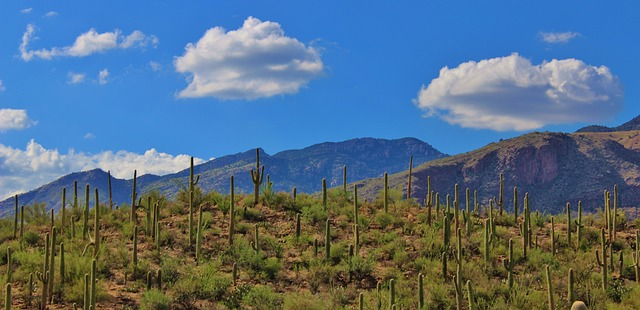
</div>
&nbsp;  

In [27]:
surveys = pd.read_csv('../Datasets/surveys.csv')

In [28]:
species = pd.read_csv('../Datasets/species.csv')

Use `surveys.head()` and `species.head()` to identify the common column.

In [29]:
surveys.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [30]:
species.head()

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird


Merge these two datasets together so that you end up with a dataframe that contains the survey results as well as the genus, species and taxa.

In [31]:
df = surveys.merge(species, how = 'outer', on = 'species_id')

In [32]:
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,3126.0,7.0,21.0,1980.0,8.0,AB,NaN,NaN,NaN,Amphispiza,bilineata,Bird
1,3146.0,7.0,21.0,1980.0,24.0,AB,NaN,NaN,NaN,Amphispiza,bilineata,Bird
2,3152.0,7.0,21.0,1980.0,19.0,AB,NaN,NaN,NaN,Amphispiza,bilineata,Bird
3,3153.0,7.0,21.0,1980.0,22.0,AB,NaN,NaN,NaN,Amphispiza,bilineata,Bird
4,3586.0,12.0,15.0,1980.0,16.0,AB,NaN,NaN,NaN,Amphispiza,bilineata,Bird


### Pandas revision: investigate your dataset

With the resulting dataset...

- drop the species_id column
- add a new column called 'fullname' that concatenates the genus and species columns (with a space in between)
- sort the dataframe by record_id in descending order
- find the minimum, maximum and mean of hindfoot_length
- count the number of occurrences of each genus (hint: use value_counts())

In [33]:
df = df.drop(columns = 'species_id')
df.head()

,record_id,month,day,year,plot_id,sex,hindfoot_length,weight,genus,species,taxa
0,3126.0,7.0,21.0,1980.0,8.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird
1,3146.0,7.0,21.0,1980.0,24.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird
2,3152.0,7.0,21.0,1980.0,19.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird
3,3153.0,7.0,21.0,1980.0,22.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird
4,3586.0,12.0,15.0,1980.0,16.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird


In [34]:
df['fullname'] = df['genus'] + ' ' + df['species']
df.head()

,record_id,month,day,year,plot_id,sex,hindfoot_length,weight,genus,species,taxa,fullname
0,3126.0,7.0,21.0,1980.0,8.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird,Amphispiza bilineata
1,3146.0,7.0,21.0,1980.0,24.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird,Amphispiza bilineata
2,3152.0,7.0,21.0,1980.0,19.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird,Amphispiza bilineata
3,3153.0,7.0,21.0,1980.0,22.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird,Amphispiza bilineata
4,3586.0,12.0,15.0,1980.0,16.0,NaN,NaN,NaN,Amphispiza,bilineata,Bird,Amphispiza bilineata


In [35]:
df = df.sort_values(by = 'record_id', ascending = False)
df.head()

,record_id,month,day,year,plot_id,sex,hindfoot_length,weight,genus,species,taxa,fullname
35554,35549.0,12.0,31.0,2002.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14493,35548.0,12.0,31.0,2002.0,7.0,M,36.0,51.0,Dipodomys,ordii,Rodent,Dipodomys ordii
34187,35547.0,12.0,31.0,2002.0,10.0,F,15.0,14.0,Reithrodontomys,megalotis,Rodent,Reithrodontomys megalotis
739,35546.0,12.0,31.0,2002.0,15.0,NaN,NaN,NaN,Ammospermophilus,harrisi,Rodent,Ammospermophilus harrisi
738,35545.0,12.0,31.0,2002.0,15.0,NaN,NaN,NaN,Ammospermophilus,harrisi,Rodent,Ammospermophilus harrisi


In [36]:
df['hindfoot_length'].min()

2.0

In [37]:
df['hindfoot_length'].max()

70.0

In [38]:
df['hindfoot_length'].mean()

29.287931802277498

In [39]:
# Or you can use...
df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.477847,15.991195,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396925,8.257366,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,10.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


In [40]:
df['genus'].value_counts()

genus
Dipodomys           16167
Chaetodipus          6029
Onychomys            3267
Reithrodontomys      2694
Peromyscus           2234
Perognathus          1629
Neotoma              1253
Ammospermophilus      437
Amphispiza            303
Spermophilus          249
Sigmodon              234
Sylvilagus             75
Pipilo                 52
Campylorhynchus        50
Baiomys                46
Callipepla             16
Calamospiza            13
Rodent                 10
Pooecetes               8
Sceloporus              6
Sparrow                 4
Lizard                  4
Ammodramus              2
Cnemidophorus           2
Zonotrichia             2
Crotalus                2
Eumeces                 1
Gambelia                1
Spizella                1
Zenaida                 1
Name: count, dtype: int64

Can you start making informative plots of this dataset? What do you think is most interesting and important to visualise?

*Tip: This helps to prepare for the group project later in the course*

In [ ]:
# few suggestions given in answer notebook! It's up to you!
# remember to import seaborn to be able to make plots
import seaborn as sns


In [ ]:
sns.pairplot(df, corner = True)

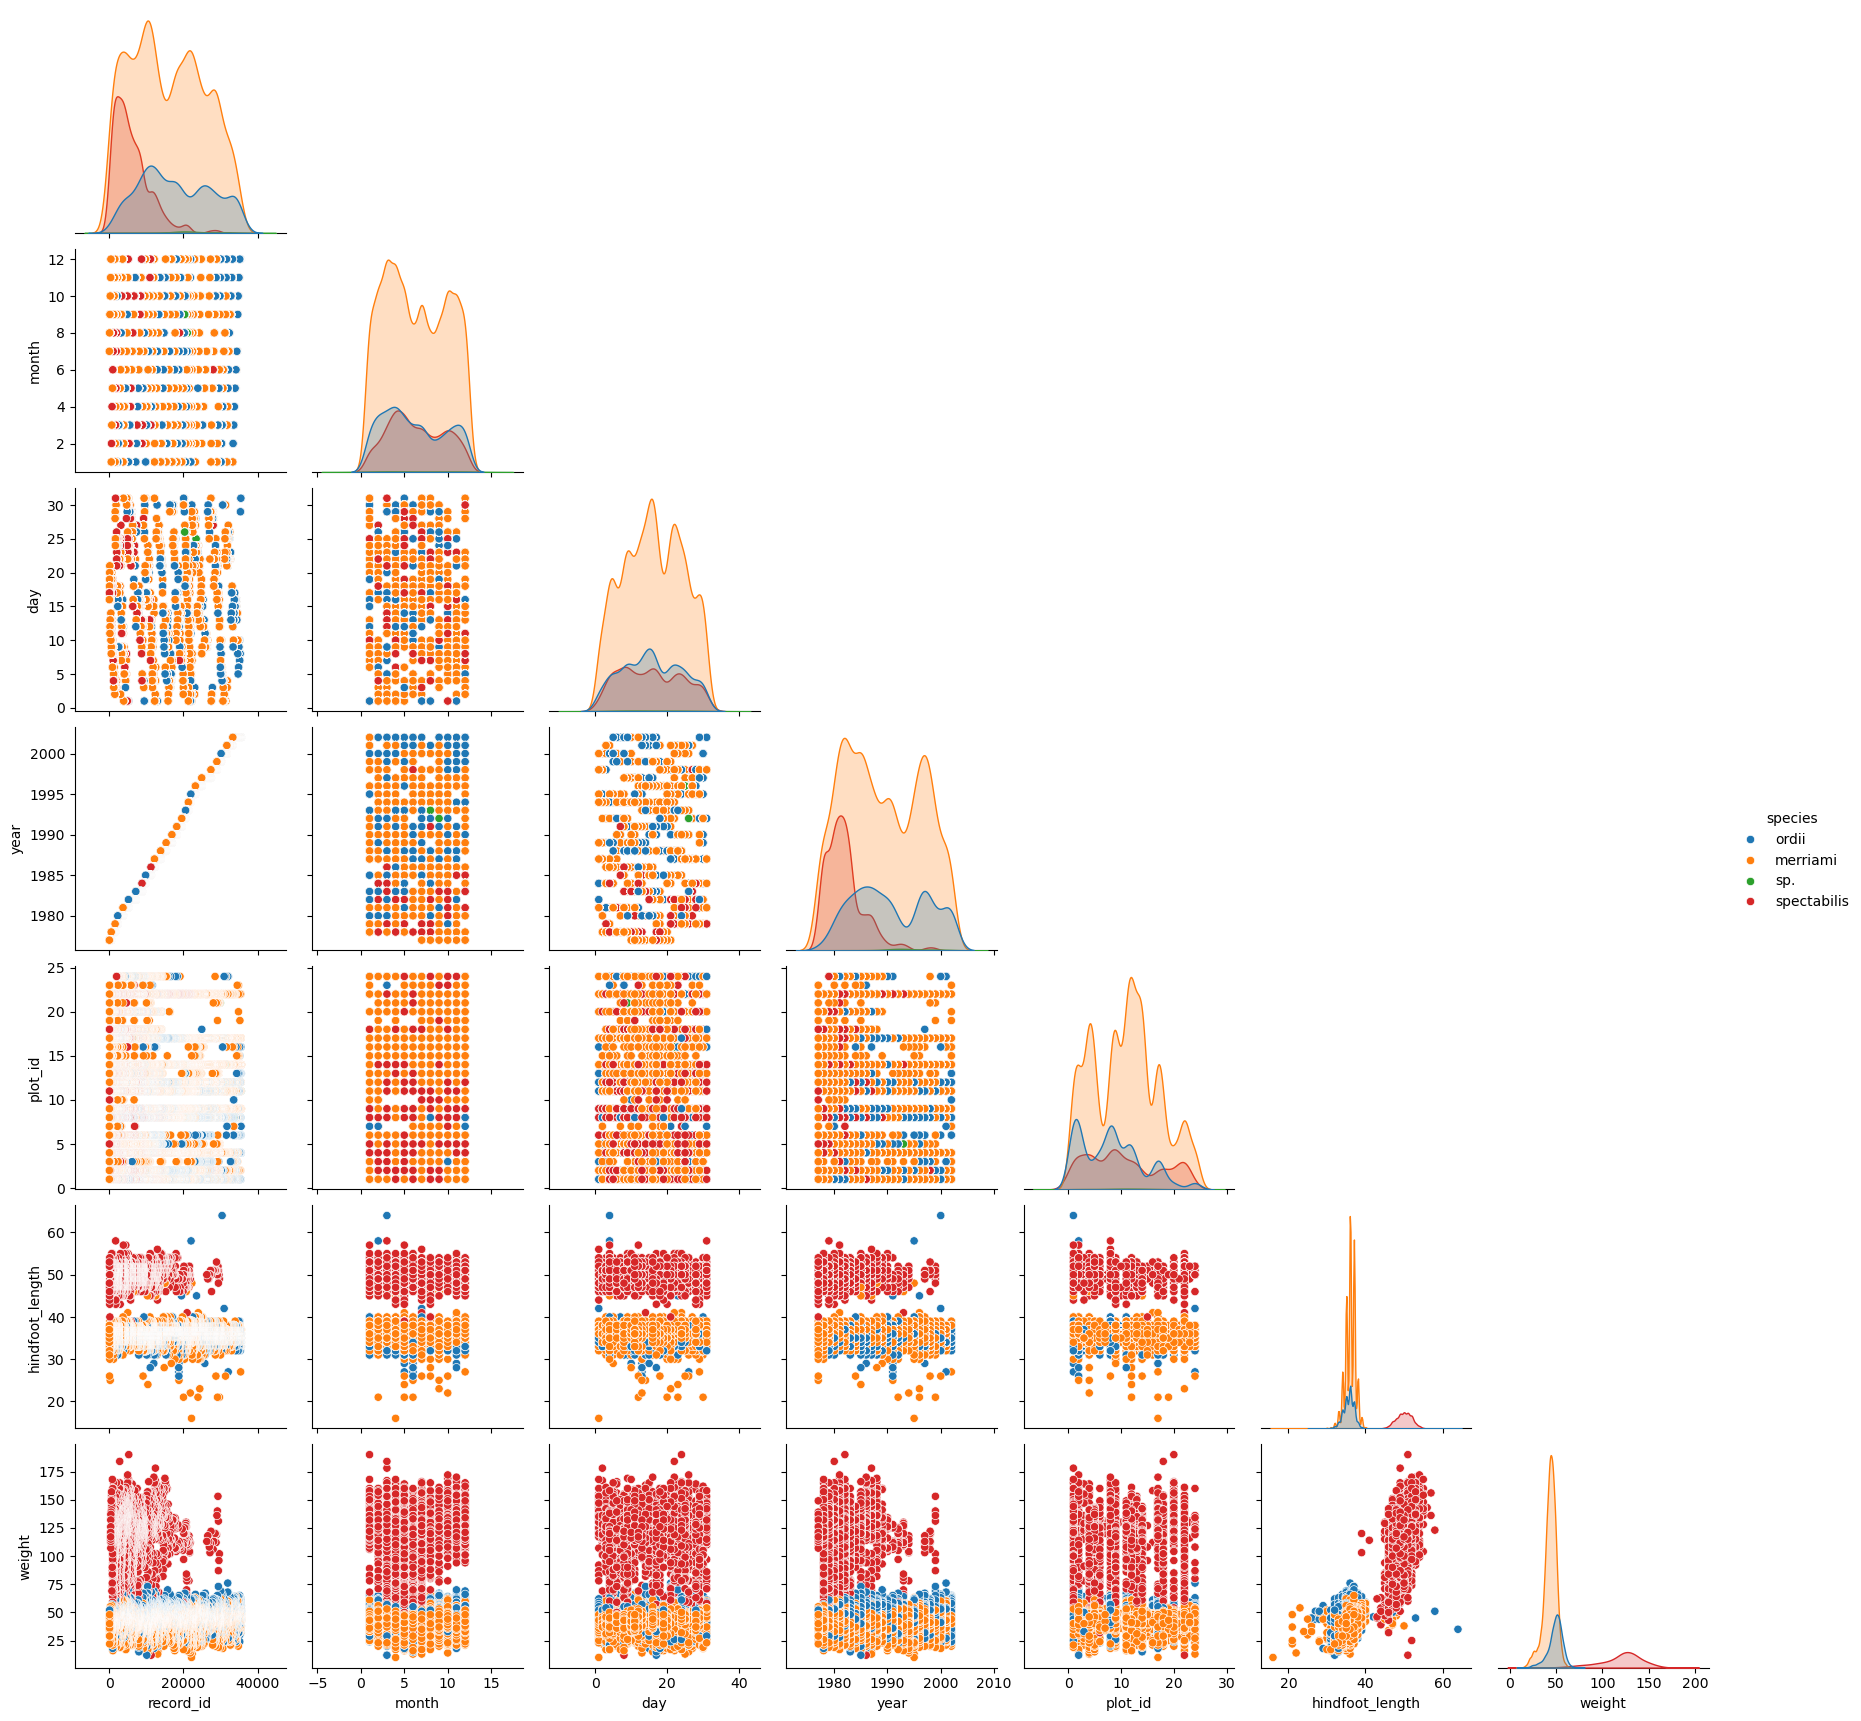

In [46]:
df_Dipodomys = df[df['genus'] == 'Dipodomys']

sns.pairplot(df_Dipodomys, hue = 'species', corner = True)

# Class 7 homework: do an example class test

This is in `Example_Tests/ExampleTest_PlantTFs_paper.ipynb`